<a href="https://colab.research.google.com/github/1ZeroStorm/Machine_Learning_Projects/blob/main/SATRIA2025%20-%20Logistic%20%26%20Linear%20Regression/Problem1%20(LinearRegression)/LinearRegression_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 01 - LINEAR REGRESSION

***

<br>

In this project, you are tasked with building a linear regression model to estimate the likelihood of a student passing the admission selection for XYZ University. The goal is to use the information provided in the dataset to make accurate predictions about a student's chances based on their academic background and demographic factors.

The dataset contains:
- Jenis_kelamin (Gender): 0 or 1 (male or female)
- Kota_Asal (Hometown): 0 to 10 (New York, Jakarta, Surabaya, London, Paris, Tokyo, Madrid, Berlin, Parma, Dubai, Sydney)
- Nilai_UTBK (UTBK Score) -> standardized test used for university admissions
- NIlai_Rapor (Report Card Score): 0 to 10
- Kemungkinan_Lulus_seleksi (Probability of Passing the Selection): 0 to 1

Your task is to analyze this data, build a regression model, and explore how different variables, such as standardized test scores, school grades, and even geographic origin, might influence a student’s chances of getting into XYZ University. This project not only helps in understanding how regression works but also provides insight into real-world decision-making processes in education.

### Import Python Library (2 Point)

In [3]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


### Read the CSV Files (8 Point)

In [4]:
# Baca file CSV
# read the csv files

df = pd.read_csv('data_problem_1.csv')
df

,Jenis_Kelamin,Kota_Asal,Nilai_UTBK,Nilai_Rapor,Kemungkinan_Lulus_seleksi
0,1,5,309,8.26,0.65
1,0,6,304,8.64,0.68
2,1,2,319,8.00,0.65
3,1,2,299,7.34,0.42
4,1,3,336,9.80,0.97
...,...,...,...,...,...
275,1,5,336,9.76,0.96
276,1,6,329,9.18,0.87
277,1,10,306,8.22,0.72
278,1,8,302,7.25,0.57


In [5]:
# Tampilkan 5 data pertama
# show the first 5 data
df.head()

,Jenis_Kelamin,Kota_Asal,Nilai_UTBK,Nilai_Rapor,Kemungkinan_Lulus_seleksi
0,1,5,309,8.26,0.65
1,0,6,304,8.64,0.68
2,1,2,319,8.00,0.65
3,1,2,299,7.34,0.42
4,1,3,336,9.80,0.97


In [6]:
# Tampilkan 5 data terakhir
# show the last 5 data
df.tail()

,Jenis_Kelamin,Kota_Asal,Nilai_UTBK,Nilai_Rapor,Kemungkinan_Lulus_seleksi
275,1,5,336,9.76,0.96
276,1,6,329,9.18,0.87
277,1,10,306,8.22,0.72
278,1,8,302,7.25,0.57
279,1,3,314,8.25,0.62


In [7]:
# Tampilkan ringkasan (kolom, tipe data, dan jumlah non-null) dari data
# show the summary (columns, data types, non-null count) of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis_Kelamin              280 non-null    int64  
 1   Kota_Asal                  280 non-null    int64  
 2   Nilai_UTBK                 280 non-null    int64  
 3   Nilai_Rapor                280 non-null    float64
 4   Kemungkinan_Lulus_seleksi  280 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 11.1 KB


In [8]:
# Tampilkan ringkasan statistik (untuk kolom numerik)
# show the stats summary (for numeric columns)
df.describe()

,Jenis_Kelamin,Kota_Asal,Nilai_UTBK,Nilai_Rapor,Kemungkinan_Lulus_seleksi
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.510714,4.810714,317.171429,8.603107,0.730357
std,0.500780,3.070829,11.363933,0.594385,0.138468
min,0.000000,0.000000,290.000000,6.800000,0.340000
25%,0.000000,2.000000,310.000000,8.200000,0.640000
50%,1.000000,5.000000,317.000000,8.640000,0.730000
75%,1.000000,8.000000,325.000000,9.040000,0.822500
max,1.000000,10.000000,340.000000,9.920000,0.970000


### Plotting The Data (5 Point)

/tmp/ipython-input-409271286.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


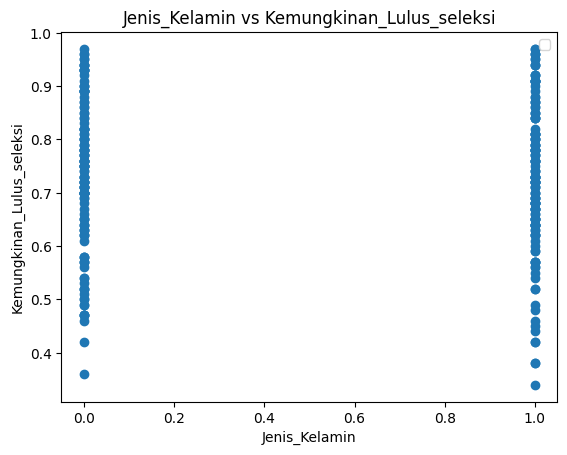

correlation -0.023315511398588062 



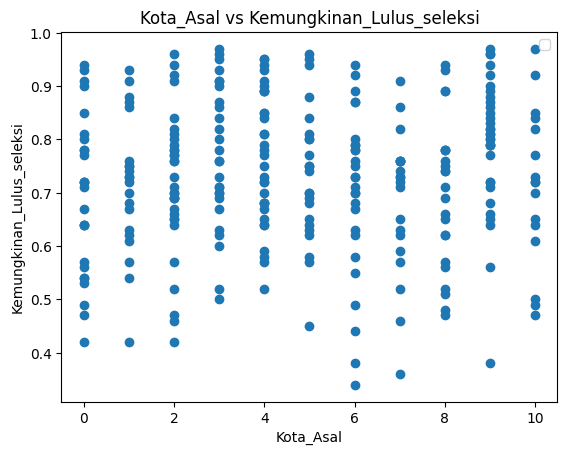

correlation 0.04306465503746972 



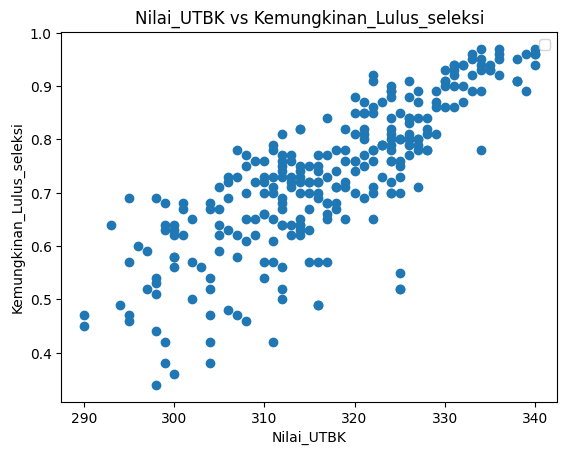

correlation 0.8086758512248653 



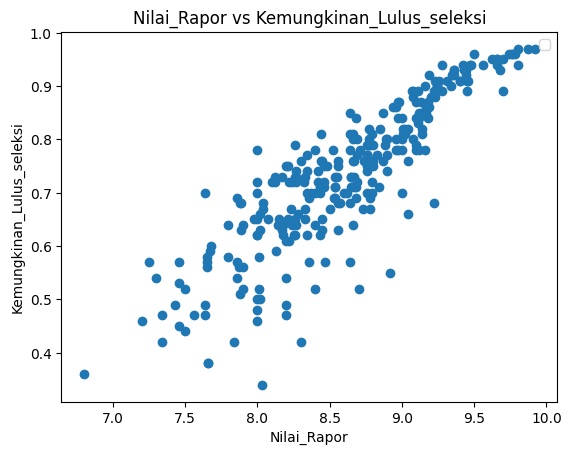

correlation 0.8745603847637847 



In [9]:

# (Choose one input feature from the dataset and plot it against the target variable using a scatter plot to show its correlation.)
### Plotting The Data (5 Point)
for col in df.drop('Kemungkinan_Lulus_seleksi', axis= 1).columns:
  plt.scatter(df[col], df["Kemungkinan_Lulus_seleksi"])
  plt.title(f'{col} vs Kemungkinan_Lulus_seleksi')
  correlation = df[col].corr(df["Kemungkinan_Lulus_seleksi"])
  plt.xlabel(f'{col}')
  plt.ylabel('Kemungkinan_Lulus_seleksi')

  plt.legend()
  plt.show()
  print('correlation',correlation, "\n")


### Question 01 (10 Point) <br>
Based on the plot you created, explain why you selected that feature to analyze. Discuss the relationship between the selected feature and the target variable. Use the text box below to write your explanation.



**My Answer**

It can be seen from the scatter plot that the columns *Nilai_Rapor* (Report Card Score) and *Nilai_UTBK* (UTBK Score) influence the column *Kemungkinan_Lulus_seleksi* (Probability of Passing the Selection), because they have a positive correlation. Therefore, *Nilai_Rapor* and *Nilai_UTBK* can be used as effective features (X), while *Kemungkinan_Lulus_seleksi* serves as the target variable (Y).  

The correlation values from the `corr` function are equal to or greater than 0.8. This is also visible in the scatter plot: the higher the *Nilai_Rapor* or the higher the *Nilai_UTBK*, the greater the *Kemungkinan_Lulus_seleksi*. From this, it is possible to make predictions of the selection probability based on these feature columns.  

I chose *Nilai_Rapor* and *Nilai_UTBK* as features for the linear regression model because they have the strongest correlation with the target (*Kemungkinan_Lulus_seleksi*).  

### Linear Regression (10 Point)

### first model (fitur Nilai_Rapor dan Nilai_UTBK vs target Kemungkinan_Lulus_seleksi)

In [10]:
# Kembangkan Model Regresi linear Anda Di Sini (Develop your linear Regression Model Here)
#Jangan gunakan model lain selain yang diminta (Do not use any AI models other than the one requested.)

#Hati hati dalam pemilihan fitur dan variabel target (Be careful in selecting features and the target variable.)
# Print the model MSE, and R-squared
X = df[['Nilai_Rapor', 'Nilai_UTBK']]
y = df['Kemungkinan_Lulus_seleksi']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [12]:
### Linear Regression (10 Point)
model_main = LinearRegression()
model_main.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model_main.predict(X_test)

In [14]:
# MSE, R2, Intercept, koef

print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"Mean Error: {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"r^2 score: {r2_score(y_pred, y_test)}")
print(f"intercept: {model_main.intercept_}")
print(f"coeficient: {model_main.coef_}")


MSE: 0.0029954767467482496
Mean Error: 0.054730948710471385
r^2 score: 0.8204877494391072
intercept: -1.6209854584107282
coeficient: [0.15720778 0.00314273]


### Second model (fitur Nilai_Rapor saja vs target Kemungkinan_Lulus_seleksi)
comparing the accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


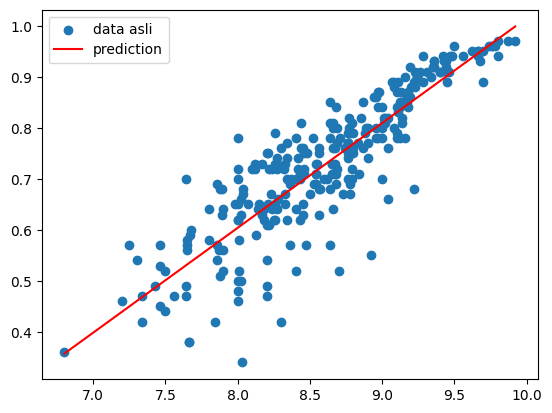

MSE: 0.003392028059165639
Mean Error: 0.05824112000267199
r^2 score: 0.7727925386398855
intercept: -1.0403451171395588
coeficient: [0.20553597]


In [15]:
X = df[['Nilai_Rapor']]
y = df['Kemungkinan_Lulus_seleksi']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = model.predict(X_range)

plt.scatter(X, y, label = 'data asli')
plt.plot(X_range, y_range, label = 'prediction', color = 'red')
plt.legend()
plt.show()

# MSE, R2, Intercept, koef
print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"Mean Error: {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"r^2 score: {r2_score(y_pred, y_test)}")
print(f"intercept: {model.intercept_}")
print(f"coeficient: {model.coef_}")

### Question 02 (15 Point) <br>
Explain why you selected that columns as the feature and the target variable! Use the text box below to write your explanation.



#### Answer:

I included the features *Nilai_Rapor* (Report Card Score) and *Nilai_UTBK* (UTBK Score) in the main (first) model because:  
- Both features have a positive correlation above 0.8 with the target *Kemungkinan_Lulus_seleksi* (Probability of Passing the Selection), which allows for accurate predictions using these features with the target column.  
- The mean squared error (MSE) is smaller than the MSE of the second model (which uses ONLY *Nilai_Rapor* vs *Kemungkinan_Lulus_seleksi*), meaning that the first model produces predictions with less deviation.  
- The R² score is higher, which indicates that the model can better explain the variance.  

Therefore, it can be concluded that *Nilai_Rapor* and *Nilai_UTBK* have a stronger influence on the *Kemungkinan_Lulus_seleksi* column compared to other features. This implies that if a student wants to pass, they must have both high report card scores and high UTBK scores.  

### Export Mode

Only change the '''put your model here''' with your model variable and '[angka peserta] [nama lengkap] [SMP/SMA] [nomor soal].pkl'<br>
<br>
Example:<br>
with open('123_PegasusViolinSurjaningtyas_SMA_1.pkl', 'wb') as f:<br>
    pickle.dump(Mymodel, f)

In [16]:
import pickle
# Simpan Model ke File (Save the model to a file)
with open('089_Yohanes_Arya_Prasetyayuda_SMA_1.pkl', 'wb') as f:
    #pickle.dump(model_main, f)
    print("Model saved")

Model saved
